In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

metro_data = pd.read_csv('/Users/camilledunning/Downloads/metro_data.csv')

def gen_plot(title, x, y, x_data, y_data, lw):
    plt.figure()
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(x_data, y_data, lw = lw)
    
def analysis(metro):
    metro_area_data = metro_data.loc[metro_data['MetroName'] == metro]
    metro_area_data = metro_area_data.loc[pd.to_datetime(metro_area_data['Date']).dt.year >= 2005]
    metro_area_dates = pd.to_datetime(metro_area_data['Date']).dt.year
    metro_area_zhvi = metro_area_data['ZHVI_AllHomes']
    
    sns.set(palette = 'hls', rc = {'figure.figsize':(11, 4)})

    gen_plot('ZHVI Time Series Data for ' + metro + ' Metropolitan Area', 
         'Year', 
         'ZHVI (Zillow Home Value Index)',
         metro_area_dates, 
         metro_area_zhvi, 
         4)
    
    mlp_sqft_metro_area = [metro_area_data['MedianListingPricePerSqft_1Bedroom'], 
                           metro_area_data['MedianListingPricePerSqft_2Bedroom'],
                           metro_area_data['MedianListingPricePerSqft_3Bedroom'],
                           metro_area_data['MedianListingPricePerSqft_4Bedroom'],
                           metro_area_data['MedianListingPricePerSqft_5BedroomOrMore']]
    
    sns.set(palette = 'hls', style = 'darkgrid', rc = {'figure.figsize':(11, 7)})
    fig, ax = plt.subplots()
    for i in range(len(mlp_sqft_metro_area)):
        ax.plot(metro_area_dates, mlp_sqft_metro_area[i], lw = 2, label = 'MedianListingPricePerSqft_' + str(i + 1) + 'Bedroom')
        plt.legend()
        
    plt.title('Median Listing Price Per Square Feet for Number of Bedrooms in Unit')
    plt.xlabel('Year')
    plt.ylabel('Median Listing Price')
    
    mlp_allhomes = metro_area_data['MedianListingPricePerSqft_AllHomes']

    sns.set(palette = 'hls', rc = {'figure.figsize':(11, 4)})

    gen_plot('Median Price Per Square Foot for All Zillow Homes in ' + metro + ' Metropolitan Area',
             'Year',
             'Median Price',
             metro_area_dates,
             mlp_allhomes, 
             4)
    
    zhvi_sqft_allhomes = metro_area_data['ZHVIPerSqft_AllHomes']
    gen_plot('ZHVI Per Square Foot for All Zillow Homes in ' + metro + ' Metropolitan Area',
             'Year',
             'ZHVI',
             metro_area_dates,
             zhvi_sqft_allhomes,
             4)
    
    zhvi_sqft_metro_area = [metro_area_data['ZHVI_1bedroom'], 
                            metro_area_data['ZHVI_2bedroom'],
                            metro_area_data['ZHVI_3bedroom'],
                            metro_area_data['ZHVI_4bedroom'],
                            metro_area_data['ZHVI_5BedroomOrMore']]

    sns.set(palette = 'hls', style = 'darkgrid', rc = {'figure.figsize':(11, 7)})

    fig, ax = plt.subplots()
    for i in range(len(zhvi_sqft_metro_area)):
        ax.plot(metro_area_dates, zhvi_sqft_metro_area[i], lw = 2, label = 'ZHVI_' + str(i + 1) + 'Bedroom')
        plt.legend()

    plt.title('ZHVI for Number of Bedrooms in Unit')
    plt.xlabel('Year')
    plt.ylabel('ZHVI')

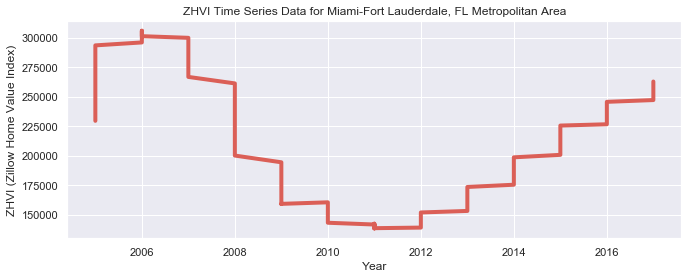

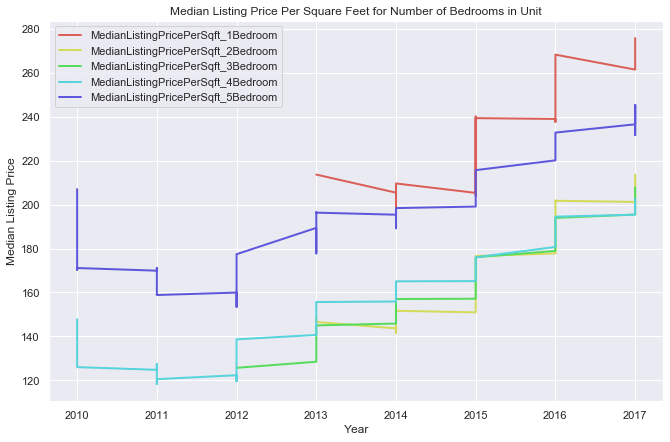

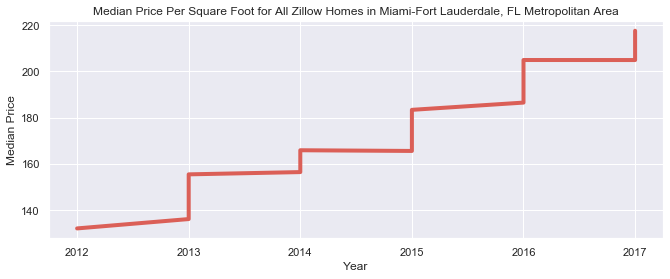

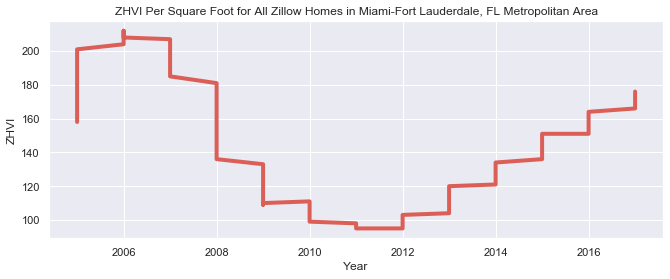

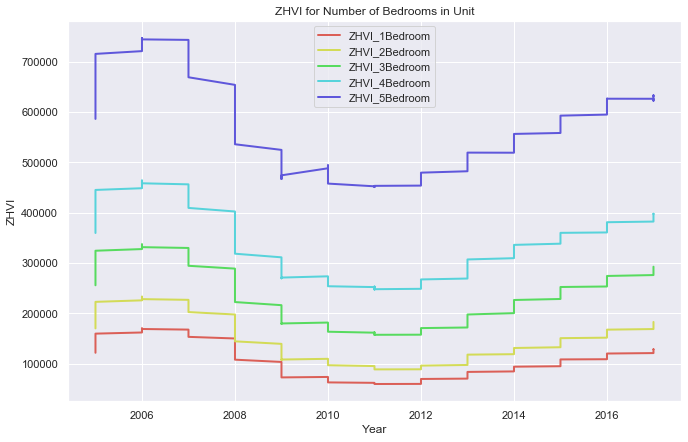

In [20]:
analysis('Miami-Fort Lauderdale, FL')